# Data Science
- Student: Dmytro Geleshko
- Group: IP-91
- Var: 6

## Imports

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Config

In [30]:
# var 6
np.random.seed(6)
plt.rcParams["figure.figsize"] = (20, 8)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:,.3f}".format

## Functions

In [31]:
def norm(data):
    # mean 0, std 1
    data_norm = (data.copy() - data.mean()) / data.std()
    # if all values are same and dividing by std causes Nan
    data_norm.fillna(0, inplace=True)
    # apply sigmoid so that the values are in (0, 1)
    if type(data_norm) == pd.Series:
        data_norm = 1 / (1 + np.exp(data_norm))
    else:
        for column in data_norm.columns:
            data_norm[column] = 1 / (1 + np.exp(data_norm[column].values))
    
    return data_norm

## Criterias, groups, weights

In [41]:
df_description = pd.DataFrame(index=[
    "cost_20", "cost_50", "cost_100",
    "max_speed", "cost_max",
    "ping_london", "ping_new_york", "ping_amsterdam", "ping_kiev", "ping_moscow", "ping_tokyo",
    "has_gb_limits",
    "has_ip_grey", "ip_white_cost",
    "has_mobile", "mobile_3g_coverage", "mobile_4g_coverage",
    "cost_setup_house",
    "cost_setup_appartment",
    "user_score", "proff_score",
    "total_users",
    "cutoffs_past_year",
    "has_fiber_glass", "has_TV",
    "online_support", "phone_support", "priority_business_support", "24h_support"],
    columns=["func", "desc", "group"],
    dtype=str)

df_description.loc["cost_20"]["func"] = "min"
df_description.loc["cost_20"]["desc"] = "Cost for 20 mb speed"
df_description.loc["cost_20"]["group"] = "cost"

df_description.loc["cost_50"]["func"] = "min"
df_description.loc["cost_50"]["desc"] = "Cost for 50 mb speed"
df_description.loc["cost_50"]["group"] = "cost"

df_description.loc["cost_100"]["func"] = "min"
df_description.loc["cost_100"]["desc"] = "Cost for 50mb speed"
df_description.loc["cost_100"]["group"] = "cost"

df_description.loc["max_speed"]["func"] = "max"
df_description.loc["max_speed"]["desc"] = "Max internet speed offered by company"
df_description.loc["max_speed"]["group"] = "quality"

df_description.loc["cost_max"]["func"] = "min"
df_description.loc["cost_max"]["desc"] = "Cost for the best internet speed"
df_description.loc["cost_max"]["group"] = "cost"

df_description.loc["ping_london"]["func"] = "min"
df_description.loc["ping_london"]["desc"] = "Delay to servers"
df_description.loc["ping_london"]["group"] = "ping"

df_description.loc["ping_new_york"]["func"] = "min"
df_description.loc["ping_new_york"]["desc"] = "Delay to servers"
df_description.loc["ping_new_york"]["group"] = "ping"

df_description.loc["ping_amsterdam"]["func"] = "min"
df_description.loc["ping_amsterdam"]["desc"] = "Delay to servers"
df_description.loc["ping_amsterdam"]["group"] = "ping"

df_description.loc["ping_kiev"]["func"] = "min"
df_description.loc["ping_kiev"]["desc"] = "Delay to servers"
df_description.loc["ping_kiev"]["group"] = "ping"

df_description.loc["ping_moscow"]["func"] = "min"
df_description.loc["ping_moscow"]["desc"] = "Delay to servers"
df_description.loc["ping_moscow"]["group"] = "ping"

df_description.loc["ping_tokyo"]["func"] = "min"
df_description.loc["ping_tokyo"]["desc"] = "Delay to servers"
df_description.loc["ping_tokyo"]["group"] = "ping"

df_description.loc["has_gb_limits"]["func"] = "min"
df_description.loc["has_gb_limits"]["desc"] = "Has monthly limit on gb used"
df_description.loc["has_gb_limits"]["group"] = "features"

df_description.loc["has_ip_grey"]["func"] = "min"
df_description.loc["has_ip_grey"]["desc"] = "Is IP grey"
df_description.loc["has_ip_grey"]["group"] = "features"

df_description.loc["ip_white_cost"]["func"] = "min"
df_description.loc["ip_white_cost"]["desc"] = "Cost for dedicated IP"
df_description.loc["ip_white_cost"]["group"] = "other_cost"

df_description.loc["has_mobile"]["func"] = "max"
df_description.loc["has_mobile"]["desc"] = "Does company provide mobile services"
df_description.loc["has_mobile"]["group"] = "phone"

df_description.loc["mobile_3g_coverage"]["func"] = "max"
df_description.loc["mobile_3g_coverage"]["desc"] = "Coverage of 3g services"
df_description.loc["mobile_3g_coverage"]["group"] = "phone"

df_description.loc["mobile_4g_coverage"]["func"] = "max"
df_description.loc["mobile_4g_coverage"]["desc"] = "Region coverage of LTE mobile services"
df_description.loc["mobile_4g_coverage"]["group"] = "phone"

df_description.loc["cost_setup_house"]["func"] = "min"
df_description.loc["cost_setup_house"]["desc"] = "Cost for connection for house owners"
df_description.loc["cost_setup_house"]["group"] = "other_cost"

df_description.loc["cost_setup_appartment"]["func"] = "min"
df_description.loc["cost_setup_appartment"]["desc"] = "Cost for connection for appartment owners"
df_description.loc["cost_setup_appartment"]["group"] = "other_cost"

df_description.loc["user_score"]["func"] = "max"
df_description.loc["user_score"]["desc"] = "Avg user score"
df_description.loc["user_score"]["group"] = "quality"

df_description.loc["proff_score"]["func"] = "max"
df_description.loc["proff_score"]["desc"] = "Avg score of other indepedent reviewers"
df_description.loc["proff_score"]["group"] = "quality"

df_description.loc["total_users"]["func"] = "max"
df_description.loc["total_users"]["desc"] = "Estimate of popularity"
df_description.loc["total_users"]["group"] = "quality"

df_description.loc["cutoffs_past_year"]["func"] = "min"
df_description.loc["cutoffs_past_year"]["desc"] = "Number of technical difficulties, reported last year"
df_description.loc["cutoffs_past_year"]["group"] = "quality"

df_description.loc["has_fiber_glass"]["func"] = "max"
df_description.loc["has_fiber_glass"]["desc"] = "Does provider use fiber glass"
df_description.loc["has_fiber_glass"]["group"] = "features"

df_description.loc["has_TV"]["func"] = "max"
df_description.loc["has_TV"]["desc"] = "Is TV option present"
df_description.loc["has_TV"]["group"] = "features"

df_description.loc["online_support"]["func"] = "max"
df_description.loc["online_support"]["desc"] = "Does company has online support"
df_description.loc["online_support"]["group"] = "support"

df_description.loc["phone_support"]["func"] = "max"
df_description.loc["phone_support"]["desc"] = "Does comany has phone support"
df_description.loc["phone_support"]["group"] = "support"

df_description.loc["priority_business_support"]["func"] = "max"
df_description.loc["priority_business_support"]["desc"] = "Does comany has dedicated support channel for bussines owners"
df_description.loc["priority_business_support"]["group"] = "support"

df_description.loc["24h_support"]["func"] = "max"
df_description.loc["24h_support"]["desc"] = "Does company provide 24h support"
df_description.loc["24h_support"]["group"] = "support"

# weights of feature = 1 / (# features in this group)
df_description = pd.merge(df_description, 1 / df_description["group"].value_counts(), how="left", left_on="group", right_index=True)
df_description.rename(columns={"group_x": "group", "group_y": "weight"}, inplace=True)
df_description

,func,desc,group,weight
cost_20,min,Cost for 20 mb speed,cost,0.250
cost_50,min,Cost for 50 mb speed,cost,0.250
cost_100,min,Cost for 50mb speed,cost,0.250
max_speed,max,Max internet speed offered by company,quality,0.200
cost_max,min,Cost for the best internet speed,cost,0.250
ping_london,min,Delay to servers,ping,0.167
ping_new_york,min,Delay to servers,ping,0.167
ping_amsterdam,min,Delay to servers,ping,0.167
ping_kiev,min,Delay to servers,ping,0.167
ping_moscow,min,Delay to servers,ping,0.167


In [33]:
groups = np.unique(df_description["group"].values)
group_weights = pd.Series(np.ones((groups.shape[0])) / groups.shape[0], index=groups, dtype=np.float32)
group_weights

cost         0.143
features     0.143
other_cost   0.143
phone        0.143
ping         0.143
quality      0.143
support      0.143
dtype: float32

## Collecting data about Internet providers

In [34]:
df = pd.DataFrame(columns=df_description.index, index=["EdgeRivne", "ZhyromurStar", "Firephone", "Freedom", "Alive", "RectuitIT", "Continental"])
company_count = len(df.index)

df["cost_20"] = np.random.randint(25, 75, company_count)
df["cost_50"] = np.random.randint(75, 125, company_count)
df["cost_100"] = np.random.randint(125, 175, company_count)

df["max_speed"] = np.random.randint(2, 10, company_count) * 100
df["cost_max"] = np.random.randint(2, 10, company_count) * 100

df["ping_london"] = np.random.normal(50, 5, company_count)
df["ping_new_york"] = np.random.normal(80, 5, company_count)
df["ping_amsterdam"] = np.random.normal(35, 5, company_count)
df["ping_kiev"] = np.random.normal(20, 5, company_count)
df["ping_moscow"] = np.random.normal(40, 5, company_count)
df["ping_tokyo"] = np.random.normal(100, 5, company_count)

df["has_gb_limits"] = (np.random.randn(company_count) < 0.25).astype(np.int32)

df["has_ip_grey"] = (np.random.randn(company_count) < 0.5).astype(np.int32)

df["ip_white_cost"] = np.random.randint(25, 50, company_count) * df["has_ip_grey"].values

df["has_mobile"] = (np.random.randn(company_count) < 0.75).astype(np.int32)

df["mobile_3g_coverage"] = np.random.normal(75, 5, company_count) * df["has_mobile"].values
df["mobile_4g_coverage"]= np.random.normal(60, 10, company_count) * df["has_mobile"].values

df["cost_setup_house"] = np.random.randint(1000, 1500, company_count)
df["cost_setup_appartment"] = np.random.randint(500, 1000, company_count)

df["user_score"] = np.random.normal(75, 5, company_count)
df["proff_score"] = np.random.normal(75, 5, company_count)

df["total_users"] = np.random.normal(100, 20, company_count)

df["cutoffs_past_year"] = np.random.randint(0, 15, company_count)
df["has_fiber_glass"] = (np.random.randn(company_count) < 0.5).astype(np.int32)
df["has_TV"] = (np.random.randn(company_count) < 0.5).astype(np.int32)

df["online_support"] = (np.random.randn(company_count) < 0.5).astype(np.int32)
df["phone_support"] = (np.random.randn(company_count) < 0.5).astype(np.int32)

df["priority_business_support"] = (np.random.randn(company_count) < 0.5).astype(np.int32)
df["24h_support"] = (np.random.randn(company_count) < 0.5).astype(np.int32)

df

,cost_20,cost_50,cost_100,max_speed,cost_max,ping_london,ping_new_york,ping_amsterdam,ping_kiev,ping_moscow,ping_tokyo,has_gb_limits,has_ip_grey,ip_white_cost,has_mobile,mobile_3g_coverage,mobile_4g_coverage,cost_setup_house,cost_setup_appartment,user_score,proff_score,total_users,cutoffs_past_year,has_fiber_glass,has_TV,online_support,phone_support,priority_business_support,24h_support
EdgeRivne,35,117,172,400,700,49.034,72.229,38.443,15.752,43.931,103.192,1,1,33,1,80.332,69.164,1369,673,79.000,78.357,97.316,4,1,1,1,0,0,0
ZhyromurStar,34,91,158,600,400,56.973,79.743,39.129,16.833,34.395,105.958,0,1,38,1,84.546,79.740,1104,665,79.159,70.751,96.111,2,1,1,1,1,0,0
Firephone,60,100,169,600,900,45.593,79.614,39.406,8.329,55.850,89.659,1,1,32,0,0.000,0.000,1293,701,72.129,80.975,148.105,3,1,1,1,1,1,1
Freedom,45,76,171,500,300,52.175,82.917,38.256,15.497,35.720,109.355,1,0,0,1,79.758,66.209,1302,816,78.838,78.044,83.077,11,1,1,1,0,1,0
Alive,67,86,129,900,800,56.311,77.473,35.246,27.013,41.832,110.017,0,0,0,1,78.238,55.944,1089,629,77.300,84.666,84.332,9,1,0,1,0,1,1
RectuitIT,70,88,158,400,400,42.257,90.960,35.292,20.797,37.905,110.012,0,1,35,1,72.109,42.446,1428,608,75.045,69.709,141.051,14,0,0,1,0,0,1
Continental,40,101,133,700,500,60.267,70.463,40.371,21.466,32.968,97.792,1,1,37,1,79.640,56.773,1184,949,71.981,77.077,105.217,4,1,1,1,0,1,1


## Normalization of data

In [35]:
df_norm = norm(df)
df_norm.describe().loc[["min", "mean", "max"]]

,cost_20,cost_50,cost_100,max_speed,cost_max,ping_london,ping_new_york,ping_amsterdam,ping_kiev,ping_moscow,ping_tokyo,has_gb_limits,has_ip_grey,ip_white_cost,has_mobile,mobile_3g_coverage,mobile_4g_coverage,cost_setup_house,cost_setup_appartment,user_score,proff_score,total_users,cutoffs_past_year,has_fiber_glass,has_TV,online_support,phone_support,priority_business_support,24h_support
min,0.214,0.151,0.287,0.145,0.192,0.215,0.149,0.236,0.176,0.123,0.304,0.310,0.358,0.320,0.407,0.365,0.264,0.207,0.131,0.283,0.194,0.178,0.171,0.407,0.358,0.500,0.188,0.310,0.310
mean,0.503,0.505,0.492,0.507,0.504,0.498,0.505,0.493,0.499,0.512,0.489,0.496,0.488,0.488,0.478,0.479,0.486,0.499,0.512,0.494,0.497,0.509,0.506,0.478,0.488,0.500,0.512,0.496,0.496
max,0.742,0.798,0.817,0.740,0.766,0.812,0.779,0.800,0.837,0.719,0.863,0.744,0.812,0.810,0.906,0.905,0.883,0.778,0.716,0.791,0.800,0.720,0.736,0.906,0.812,0.500,0.642,0.744,0.744


## Convert max to min

In [36]:
for column in df_norm.columns:
    if df_description.loc[column]["func"] == "max":
        df_norm[column] = 1 / (df_norm[column])
        print("Changed column:", column)
df_norm = norm(df_norm)
df_norm

Changed column: max_speed
Changed column: has_mobile
Changed column: mobile_3g_coverage
Changed column: mobile_4g_coverage
Changed column: user_score
Changed column: proff_score
Changed column: total_users
Changed column: has_fiber_glass
Changed column: has_TV
Changed column: online_support
Changed column: phone_support
Changed column: priority_business_support
Changed column: 24h_support


,cost_20,cost_50,cost_100,max_speed,cost_max,ping_london,ping_new_york,ping_amsterdam,ping_kiev,ping_moscow,ping_tokyo,has_gb_limits,has_ip_grey,ip_white_cost,has_mobile,mobile_3g_coverage,mobile_4g_coverage,cost_setup_house,cost_setup_appartment,user_score,proff_score,total_users,cutoffs_past_year,has_fiber_glass,has_TV,online_support,phone_support,priority_business_support,24h_support
EdgeRivne,0.271,0.839,0.715,0.655,0.650,0.383,0.259,0.551,0.392,0.643,0.468,0.690,0.642,0.613,0.407,0.389,0.354,0.716,0.403,0.272,0.536,0.630,0.352,0.407,0.358,0.500,0.642,0.744,0.744
ZhyromurStar,0.260,0.437,0.526,0.567,0.316,0.696,0.535,0.640,0.444,0.309,0.572,0.256,0.642,0.681,0.407,0.295,0.157,0.241,0.385,0.248,0.704,0.634,0.265,0.407,0.358,0.500,0.188,0.744,0.744
Firephone,0.668,0.630,0.681,0.567,0.798,0.269,0.529,0.672,0.171,0.865,0.150,0.690,0.642,0.598,0.906,0.896,0.803,0.583,0.468,0.754,0.388,0.149,0.305,0.407,0.358,0.500,0.188,0.310,0.310
Freedom,0.413,0.204,0.704,0.624,0.239,0.513,0.660,0.525,0.381,0.348,0.684,0.690,0.188,0.190,0.407,0.402,0.408,0.601,0.719,0.296,0.550,0.667,0.730,0.407,0.358,0.500,0.642,0.310,0.744
Alive,0.753,0.338,0.189,0.102,0.738,0.675,0.439,0.201,0.819,0.570,0.702,0.256,0.188,0.190,0.407,0.435,0.563,0.225,0.313,0.500,0.118,0.665,0.639,0.407,0.812,0.500,0.642,0.310,0.310
RectuitIT,0.780,0.376,0.526,0.655,0.316,0.198,0.840,0.203,0.634,0.423,0.702,0.256,0.642,0.642,0.407,0.554,0.686,0.785,0.278,0.670,0.712,0.246,0.817,0.906,0.812,0.500,0.642,0.744,0.310
Continental,0.335,0.649,0.215,0.463,0.419,0.779,0.219,0.760,0.662,0.271,0.287,0.690,0.642,0.669,0.407,0.405,0.553,0.360,0.857,0.756,0.586,0.598,0.352,0.407,0.358,0.500,0.642,0.310,0.310


## To Groups

In [37]:
df_norm_groups = pd.DataFrame(index=df_norm.index)

for group in group_weights.index:
    # init group column
    df_norm_groups[group] = np.zeros((df_norm.shape[0]), dtype=np.float32)
    # for all features that are in a group
    for feature in df_description.index[df_description["group"] == group]:
        df_norm_groups[group] += (df_description.loc[feature]["weight"] * (1 - df_norm[feature])) ** (-1)

# normalize
df_norm_group_norm = norm(df_norm_groups)
df_norm_group_norm

,cost,features,other_cost,phone,ping,quality,support
EdgeRivne,0.210,0.563,0.467,0.611,0.838,0.651,0.191
ZhyromurStar,0.748,0.664,0.643,0.629,0.635,0.603,0.321
Firephone,0.217,0.563,0.574,0.095,0.338,0.657,0.806
Freedom,0.684,0.648,0.518,0.605,0.677,0.384,0.413
Alive,0.447,0.545,0.815,0.583,0.245,0.720,0.676
RectuitIT,0.520,0.098,0.359,0.539,0.317,0.123,0.413
Continental,0.706,0.563,0.150,0.588,0.409,0.452,0.676


## Get result

In [38]:
data_score = pd.Series(np.zeros((df.index.shape[0])), index=df.index, dtype=np.float32)
    
for group in df_norm_group_norm.columns:
    data_score += (group_weights.loc[group] * (1 - df_norm_group_norm[group])) ** (-1)

data_score = norm(data_score).sort_values()
data_score

Alive          0.263
ZhyromurStar   0.306
EdgeRivne      0.379
Freedom        0.485
Firephone      0.522
Continental    0.584
RectuitIT      0.878
dtype: float64

In [39]:
df.insert(0, "score", data_score)
df.sort_values(by="score", inplace=True)
df

,score,cost_20,cost_50,cost_100,max_speed,cost_max,ping_london,ping_new_york,ping_amsterdam,ping_kiev,ping_moscow,ping_tokyo,has_gb_limits,has_ip_grey,ip_white_cost,has_mobile,mobile_3g_coverage,mobile_4g_coverage,cost_setup_house,cost_setup_appartment,user_score,proff_score,total_users,cutoffs_past_year,has_fiber_glass,has_TV,online_support,phone_support,priority_business_support,24h_support
Alive,0.263,67,86,129,900,800,56.311,77.473,35.246,27.013,41.832,110.017,0,0,0,1,78.238,55.944,1089,629,77.300,84.666,84.332,9,1,0,1,0,1,1
ZhyromurStar,0.306,34,91,158,600,400,56.973,79.743,39.129,16.833,34.395,105.958,0,1,38,1,84.546,79.740,1104,665,79.159,70.751,96.111,2,1,1,1,1,0,0
EdgeRivne,0.379,35,117,172,400,700,49.034,72.229,38.443,15.752,43.931,103.192,1,1,33,1,80.332,69.164,1369,673,79.000,78.357,97.316,4,1,1,1,0,0,0
Freedom,0.485,45,76,171,500,300,52.175,82.917,38.256,15.497,35.720,109.355,1,0,0,1,79.758,66.209,1302,816,78.838,78.044,83.077,11,1,1,1,0,1,0
Firephone,0.522,60,100,169,600,900,45.593,79.614,39.406,8.329,55.850,89.659,1,1,32,0,0.000,0.000,1293,701,72.129,80.975,148.105,3,1,1,1,1,1,1
Continental,0.584,40,101,133,700,500,60.267,70.463,40.371,21.466,32.968,97.792,1,1,37,1,79.640,56.773,1184,949,71.981,77.077,105.217,4,1,1,1,0,1,1
RectuitIT,0.878,70,88,158,400,400,42.257,90.960,35.292,20.797,37.905,110.012,0,1,35,1,72.109,42.446,1428,608,75.045,69.709,141.051,14,0,0,1,0,0,1


<AxesSubplot:>

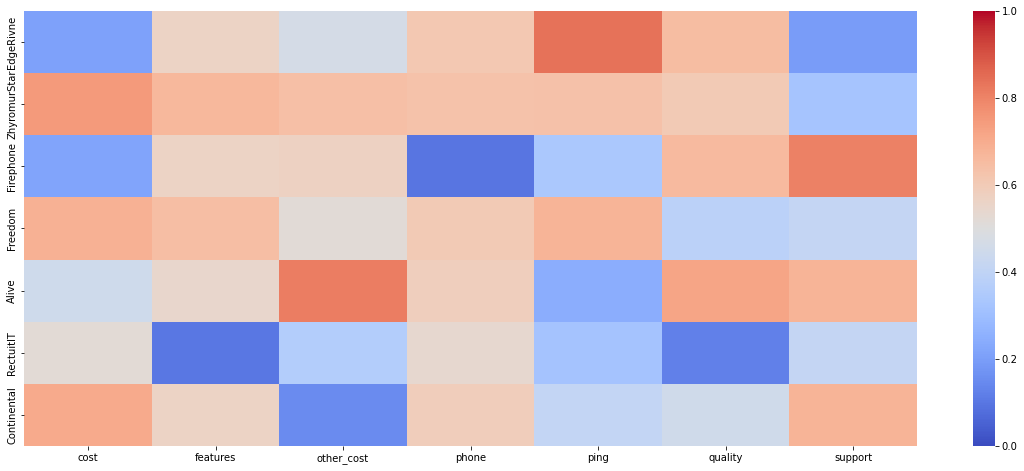

In [46]:
sns.heatmap(df_norm_group_norm, vmin=0, vmax=1, cmap="coolwarm")